# hypo3 - 노령화 지수가 높은 지역일수록, 노인의 교육시설이 많을 것이다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic') 

elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

This is a Mac or Linux environment.


In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Chrome()

# 구글 웹사이트 열기
driver.get("https://goldenjob.or.kr/infor/support-organ.asp?tn=&keyfield=&keyword=&centerLocalArea_s=&p=1")

driver.find_elements(By.CLASS_NAME, 'table-type-basic')
# driver.quit()


[<selenium.webdriver.remote.webelement.WebElement (session="c66186d7cc1bb78586d6853ace87c8b9", element="f.B604D3663B13D778A6C3DEF86DB3B182.d.DB00763F7E66C5E3AD5B715025C64127.e.164")>]

In [ ]:
body > div.contents-wrap > section.contents.boardList_basic > div.inner.list_normal > table > tbody

In [23]:
results = driver.find_elements(By.CSS_SELECTOR, 'body > div.contents-wrap > section.contents.boardList_basic > div.inner.list_normal > table > tbody')

In [24]:
for result in results:
    a = result.find_element(By.TAG_NAME, 'tr')
    
    break

In [27]:
a.text.split('\n')

['번호',
 '183',
 '기관명',
 '강남고령자취업알선센터(강남노인종합복지관)',
 '지역',
 '강남',
 '전화번호',
 '및 주소',
 '02-549-7493',
 '서울 강남구 삼성로 628 (삼성동, 강남구청 삼성로 별관) ',
 '홈페이지']

In [30]:
a.text.split('\n')[3]

'강남고령자취업알선센터(강남노인종합복지관)'

In [ ]:
a.text.split('\n')[3]

## edu

In [2]:
edu = pd.read_csv('./data/KC_ODSN_CNTEDU_FCLTY_LIST_2023.csv')
edu.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOEFPO23N000000001,문화시설,문화시설_교육_시니어,전남대학교용봉동캠퍼스평생교육원,29,광주광역시,29170,북구,2917010700,NaN,...,2917010700103000000024363,NaN,61186.0,NaN,35.179328,126.907701,공공데이터,-,20231231,20231231
1,KCOEFPO23N000000002,문화시설,문화시설_교육_시니어,고려대학교평생교육원,11,서울특별시,11290,성북구,1129013500,NaN,...,1129012500100010002039525,NaN,2841.0,NaN,37.590228,127.035858,공공데이터,-,20231231,20231231
2,KCOEFPO23N000000003,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,11,서울특별시,11350,노원구,1135010300,NaN,...,1135010300101260000014437,NaN,1797.0,NaN,37.627234,127.090297,공공데이터,-,20231231,20231231
3,KCOEFPO23N000000004,문화시설,문화시설_교육_시니어,광주가톨릭평생교육원본관,29,광주광역시,29140,서구,2914011800,NaN,...,2914011800109970001008995,NaN,61995.0,NaN,35.150379,126.868303,공공데이터,-,20231231,20231231
4,KCOEFPO23N000000005,문화시설,문화시설_교육_시니어,세종대학교평생교육원,11,서울특별시,11215,광진구,1121510900,NaN,...,1121510900100980000018572,NaN,5006.0,NaN,37.553244,127.073381,공공데이터,-,20231231,20231231


In [3]:
edu.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
                        'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
                        'UPDT_DT', 'REGIST_DT'], inplace=True)
edu.reset_index(drop=True, inplace=True)
edu.head()

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,문화시설,문화시설_교육_시니어,전남대학교용봉동캠퍼스평생교육원,광주광역시,북구,광주광역시 북구 용봉로 77 (용봉동),광주광역시 북구 용봉동 300 전남대학교,35.179328,126.907701
1,문화시설,문화시설_교육_시니어,고려대학교평생교육원,서울특별시,성북구,서울특별시 성북구 안암로 145 (안암동5가),서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스,37.590228,127.035858
2,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,서울특별시,노원구,서울특별시 노원구 화랑로 621 (공릉동),서울특별시 노원구 공릉동 126 서울여자대학교,37.627234,127.090297
3,문화시설,문화시설_교육_시니어,광주가톨릭평생교육원본관,광주광역시,서구,광주광역시 서구 상무대로 980 (쌍촌동),광주광역시 서구 쌍촌동 997-1,35.150379,126.868303
4,문화시설,문화시설_교육_시니어,세종대학교평생교육원,서울특별시,광진구,서울특별시 광진구 능동로 209 (군자동),서울특별시 광진구 군자동 98 세종대학교,37.553244,127.073381


In [4]:
edu = edu[edu['CTPRVN_NM'] == '서울특별시']
edu.reset_index(drop=True, inplace=True)
edu.head()

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,문화시설,문화시설_교육_시니어,고려대학교평생교육원,서울특별시,성북구,서울특별시 성북구 안암로 145 (안암동5가),서울특별시 성북구 안암동5가 1-2 고려대학교안암캠퍼스,37.590228,127.035858
1,문화시설,문화시설_교육_시니어,서울여자대학교평생교육원,서울특별시,노원구,서울특별시 노원구 화랑로 621 (공릉동),서울특별시 노원구 공릉동 126 서울여자대학교,37.627234,127.090297
2,문화시설,문화시설_교육_시니어,세종대학교평생교육원,서울특별시,광진구,서울특별시 광진구 능동로 209 (군자동),서울특별시 광진구 군자동 98 세종대학교,37.553244,127.073381
3,문화시설,문화시설_교육_시니어,이화여자대학교평생교육원,서울특별시,서대문구,서울특별시 서대문구 성산로 508 (대신동),서울특별시 서대문구 대신동 33 이화삼성교육관,37.562082,126.943160
4,문화시설,문화시설_교육_시니어,서울과학기술대학교평생교육원,서울특별시,노원구,서울특별시 노원구 공릉로 232 (공릉동),서울특별시 노원구 공릉동 172 서울과학기술대학교,37.630710,127.078560


In [5]:
edu['FCLTY_NM']

0          고려대학교평생교육원
1        서울여자대학교평생교육원
2          세종대학교평생교육원
3        이화여자대학교평생교육원
4      서울과학기술대학교평생교육원
            ...      
190           위너평생교육원
191         송파CS평생교육원
192     서울메디필라테스평생교육원
193     올에듀평생교육원소속멘토팀
194       스마일스토리평생교육원
Name: FCLTY_NM, Length: 195, dtype: object

In [7]:
len(edu['FCLTY_NM'].str.contains('평생교육원'))

195

## old-point

In [5]:
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [6]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '노령화지수_합계', '노령화지수_남자', '노령화지수_여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,구별,노령화지수_합계,노령화지수_남자,노령화지수_여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


### area

In [10]:
area = pd.read_excel('./data/행정구역(구별)_20241014164019.xlsx')
area.head()

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.21,100,426,467,12881,96502
3,NaN,종로구,23.91,3.95,17,87,279,1475
4,NaN,중구,9.96,1.65,15,74,253,1582


In [11]:
area.drop(columns='자치구별(1)', index=[0,2], inplace=True)
area.columns = area.loc[1, :]
area.drop(index=1, inplace=True)
area.reset_index(drop=True, inplace=True)
area.head()

1,자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,253,1582
2,용산구,21.87,3.61,16,36,357,2601
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [12]:
area.rename(columns={"자치구별(2)" : '구별'}, inplace=True)
area.head()

1,구별,면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,253,1582
2,용산구,21.87,3.61,16,36,357,2601
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [13]:
area = area[['구별', '면적 (km²)', '구성비 (%)']]

### merge

In [19]:
edu_count = edu_seoul['SIGNGU_NM'].value_counts().sort_values(ascending=False).to_frame()
edu_count.reset_index(inplace=True)

In [20]:
merged_edu = pd.merge(left=edu_count, right=area, left_on='SIGNGU_NM', right_on='구별', how='left')
merged_edu.drop(columns='구별', inplace=True)
merged_edu.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%)
0,강남구,19,39.5,6.53
1,영등포구,16,24.55,4.06
2,서초구,16,46.97,7.76
3,구로구,15,20.12,3.32
4,종로구,14,23.91,3.95


In [21]:
merged_edu['ratio'] = merged_edu['count'] / merged_edu['면적 (km²)']
merged_edu.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%),ratio
0,강남구,19,39.5,6.53,0.481013
1,영등포구,16,24.55,4.06,0.651731
2,서초구,16,46.97,7.76,0.340643
3,구로구,15,20.12,3.32,0.745527
4,종로구,14,23.91,3.95,0.585529


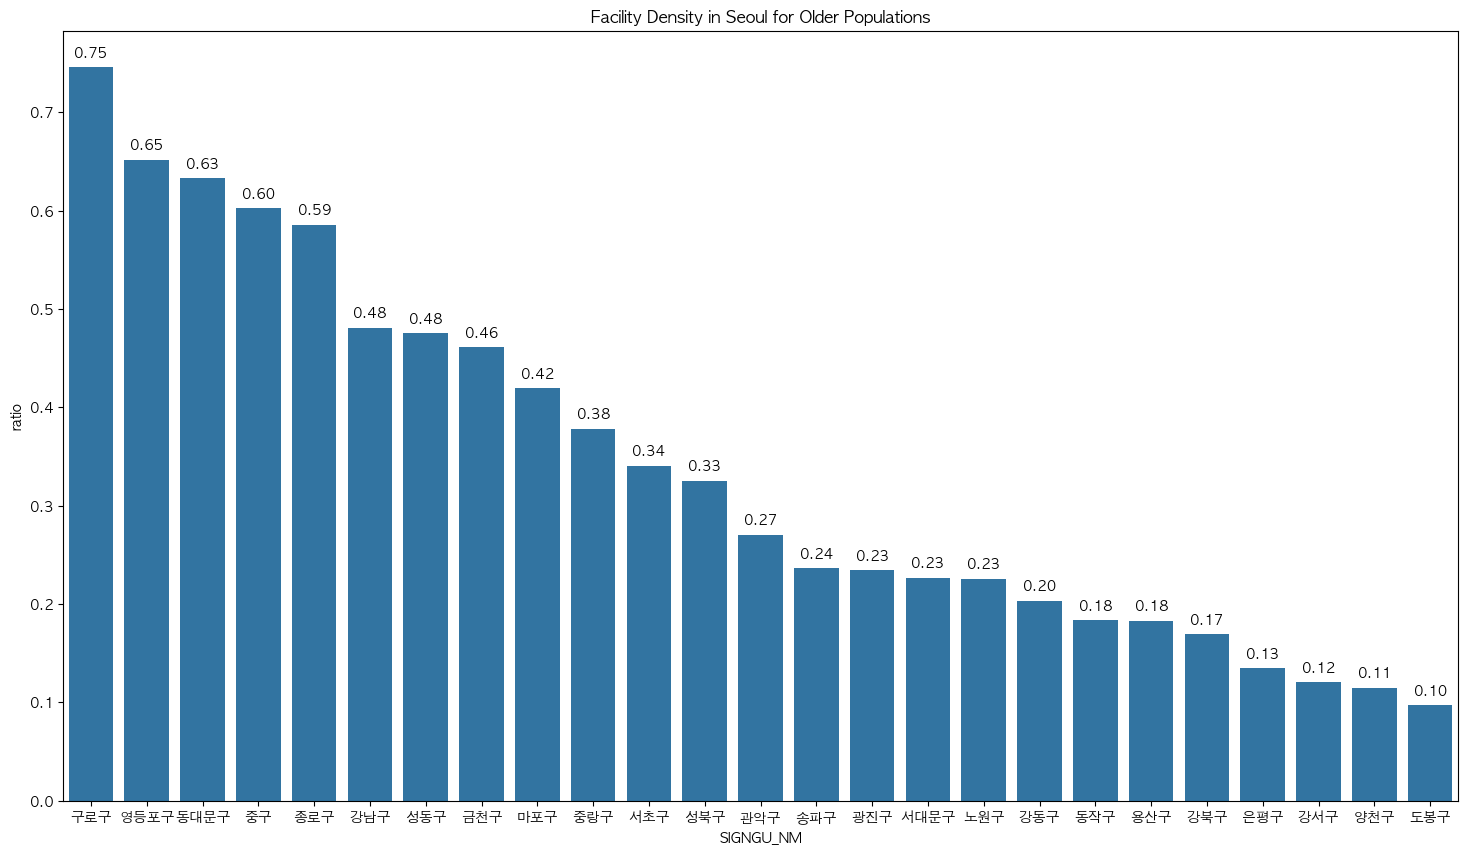

In [22]:
order = merged_edu.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=merged_edu, x='SIGNGU_NM', y='ratio', order=order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 소수점 두 자리까지만 표시
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Facility Density in Seoul for Older Populations")
plt.show()

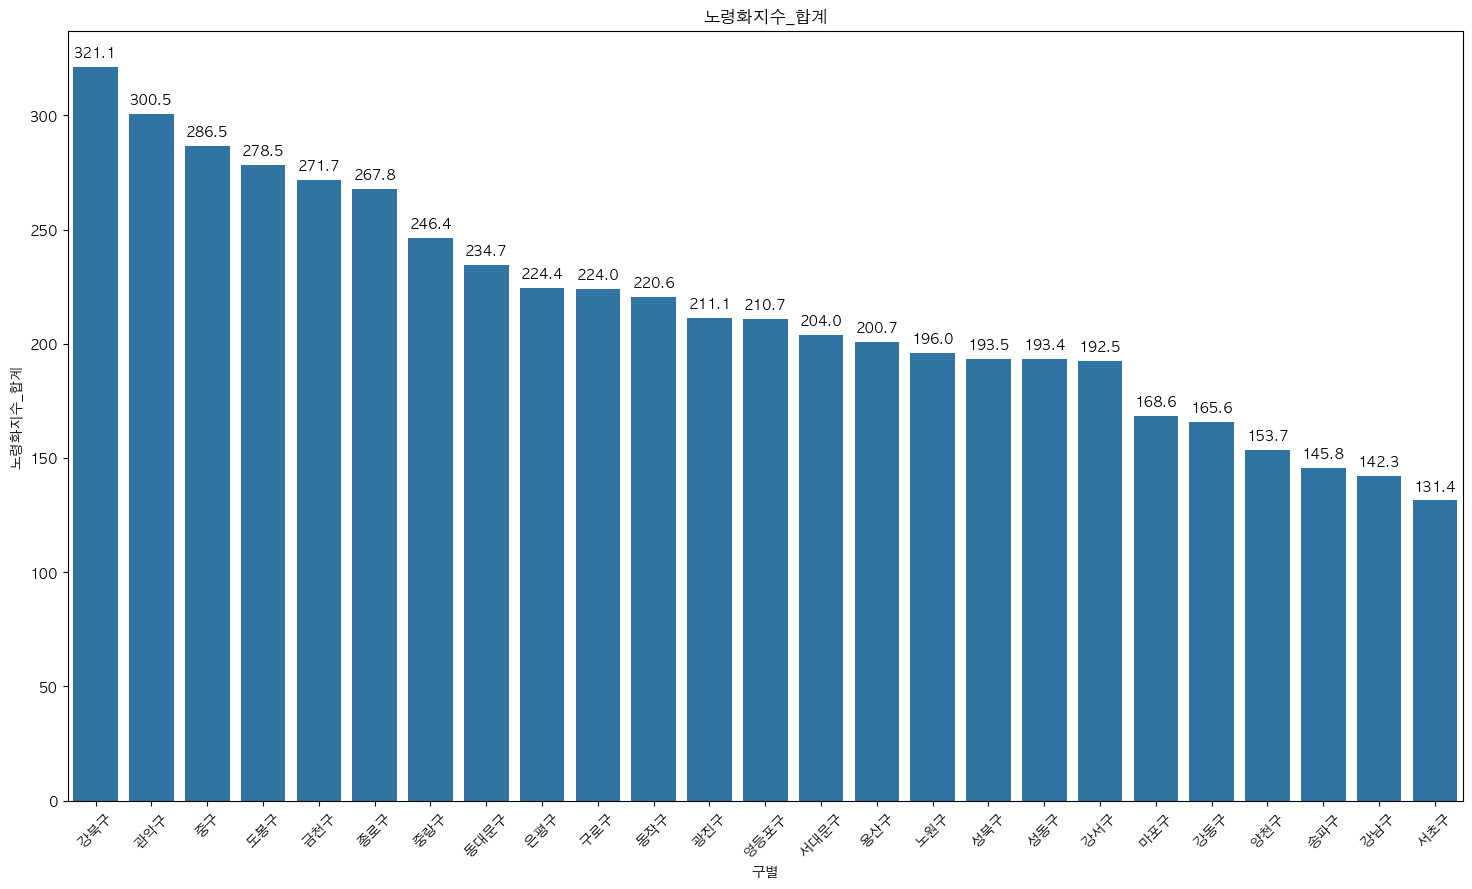

In [7]:
old_point_sorted = old_point.sort_values(by='노령화지수_합계', ascending=False)

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=old_point_sorted, x='구별', y='노령화지수_합계')
plt.title("노령화지수_합계")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

In [8]:
edu_seoul['SIGNGU_NM'].value_counts()

SIGNGU_NM
강남구     19
영등포구    16
서초구     16
구로구     15
종로구     14
마포구     10
동대문구     9
성북구      8
관악구      8
송파구      8
성동구      8
노원구      8
중랑구      7
금천구      6
중구       6
강서구      5
강동구      5
용산구      4
은평구      4
서대문구     4
광진구      4
강북구      4
동작구      3
양천구      2
도봉구      2
Name: count, dtype: int64

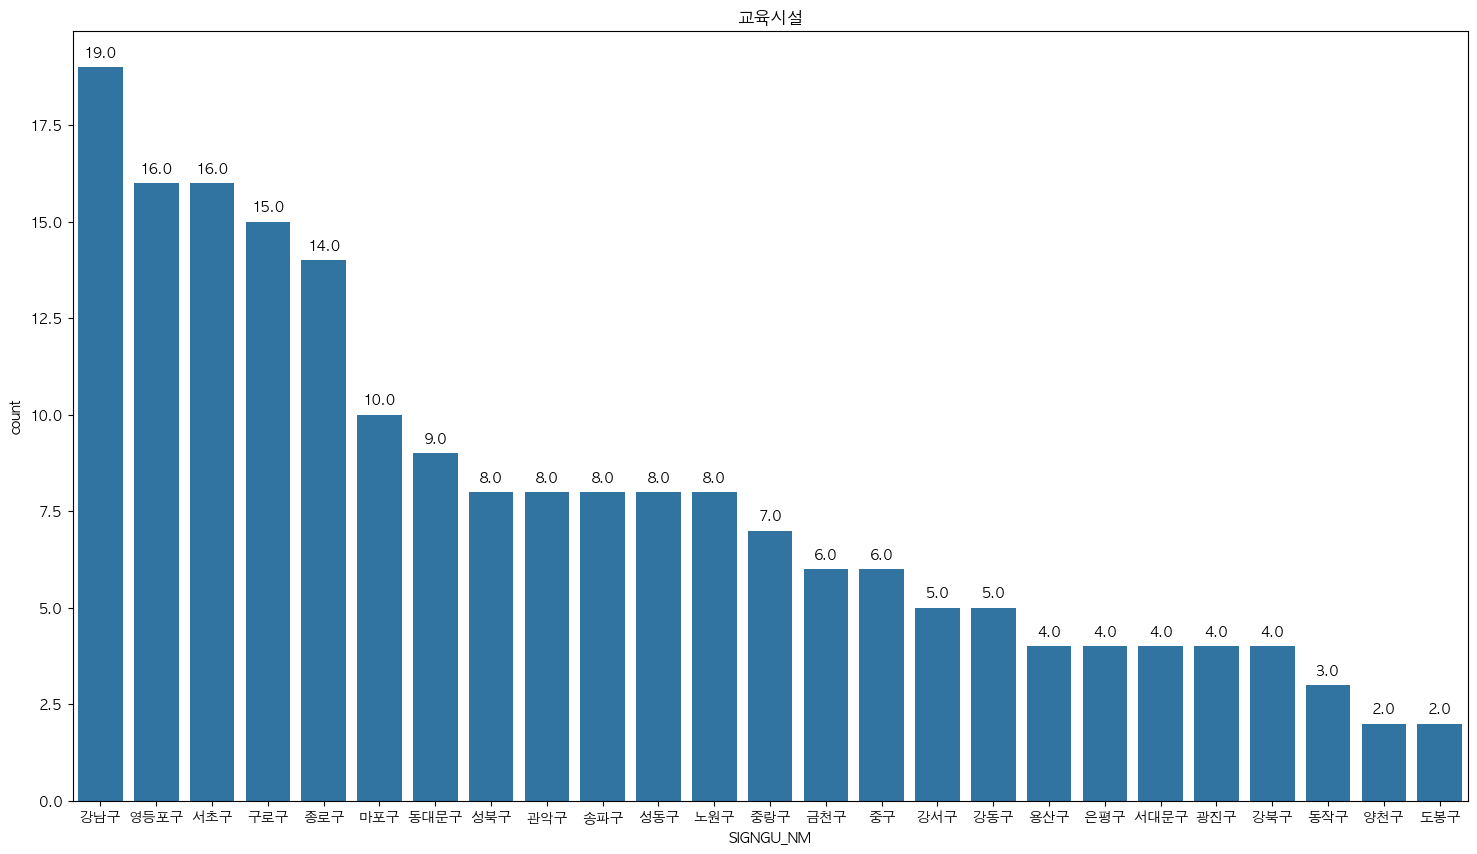

In [9]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = edu_seoul['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(18, 10))
ax = sns.countplot(data=edu_seoul, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("교육시설")
plt.show()